In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as grd

print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

2.2.3
3.9.2
0.13.2


In [5]:
def bar_and_box(data, labels, bar_title='Bar Plot', box_title='Box Plot'):
    fig = plt.figure()
    
    # create a 2 X 2 grid 
    gs = grd.GridSpec(2, 1, height_ratios=[1,10], width_ratios=[6,1], wspace=0.1)
    
    # image plot
    ax = plt.subplot(gs[2])
    p = ax.(v1,interpolation='nearest',aspect='auto') # set the aspect ratio to auto to fill the space. 
    # plt.xlabel('Day')
    # plt.ylabel('Depth')
    # plt.xlim(1,140)
    
    # color bar in it's own axis
    # colorAx = plt.subplot(gs[3])
    # cb = plt.colorbar(p, cax = colorAx)
    # cb.set_label('RWU')
    
    # line plot
    ax2 = plt.subplot(gs[0])
    
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_yticks([0,1])
    x=np.arange(1,151,1)
    ax2.plot(x,v2,'k',lw=0.5)
    plt.xlim(1,140)
    plt.ylim(0,1.1)
    
    plt.show()

In [6]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


1. Determinez quelles sont les variables Discrètes et Continues du dataset

In [7]:
discrete = ['Country','Year']
continuous = ['Spending_USD','Life_Expectancy']



2. Analysez la variable "Country".

count     274
unique      6
top       USA
freq       51
Name: Country, dtype: object

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

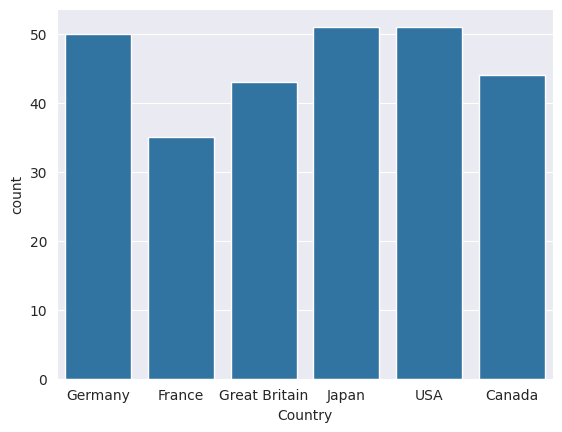

In [8]:
display(df['Country'].describe())
display(df['Country'].unique())
sns.countplot(x='Country', data=df)
plt.show()

3. Analysez la variable "Spending_USD".

- Formulez dans une phrase claire ce que signifie la moyenne issue de cette analyse (Attention, soyez vraiment précis, c'est important)

- Réalisez les 2 graphiques utiles pour cette analyse

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

La moyenne issue de cette analyse represente la moyenne de toute les depenses annuelles faites entre 1970 et 2020 par les 6 pays suivant : Germany, France, Great Britain, Japan, USA, Canada


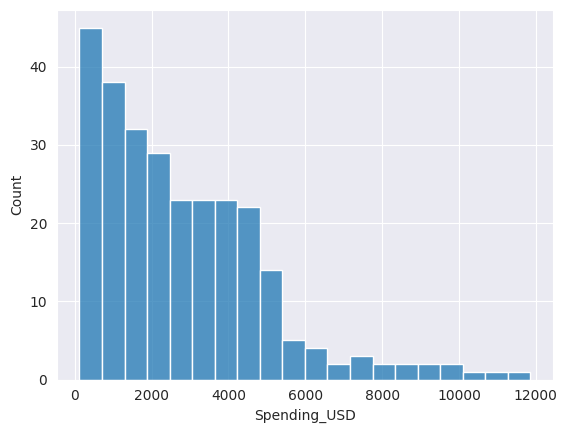

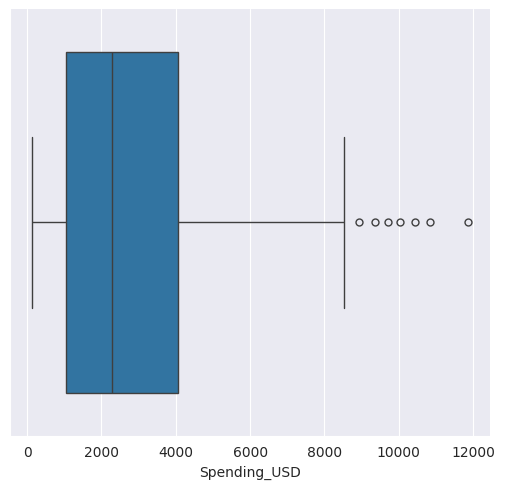

In [9]:
display(df['Spending_USD'].describe())
plt.show()
print('La moyenne issue de cette analyse represente la moyenne de toute les depenses annuelles faites entre 1970 et 2020 par les 6 pays suivant : Germany, France, Great Britain, Japan, USA, Canada')

sns.histplot(x='Spending_USD', data=df,bins=20)
plt.show()
sns.catplot(x='Spending_USD', data=df, kind='box')
plt.show()

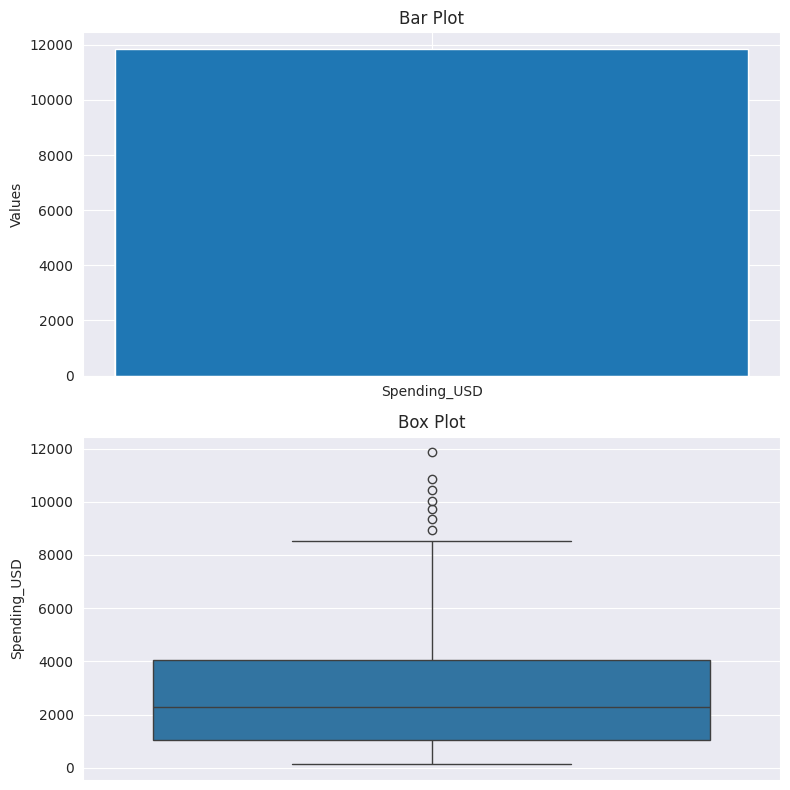

In [10]:
bar_and_box(df['Spending_USD'], 'Spending_USD')



4. Faites de même pour la variable "Life_Expectancy"

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

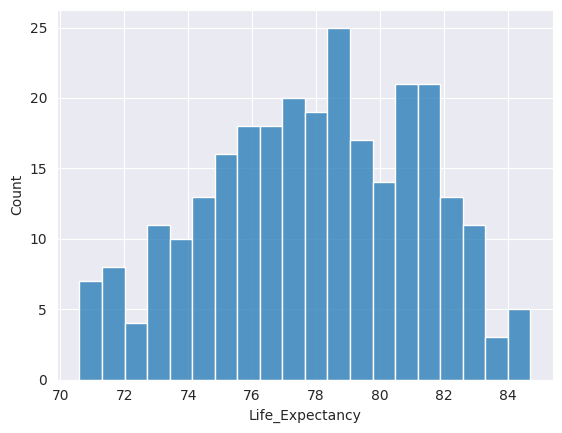

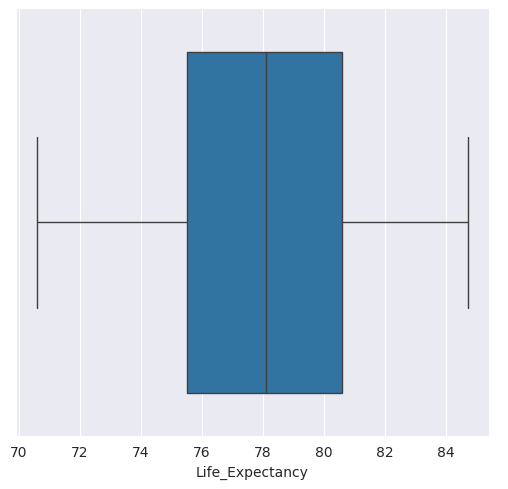

In [11]:
display(df['Life_Expectancy'].describe())
plt.show()
sns.histplot(x='Life_Expectancy', data=df,bins=20)
plt.show()
sns.catplot(x='Life_Expectancy', data=df, kind='box')
plt.show()

5. Observez l'évolution de la durée de vie à travers le temps.

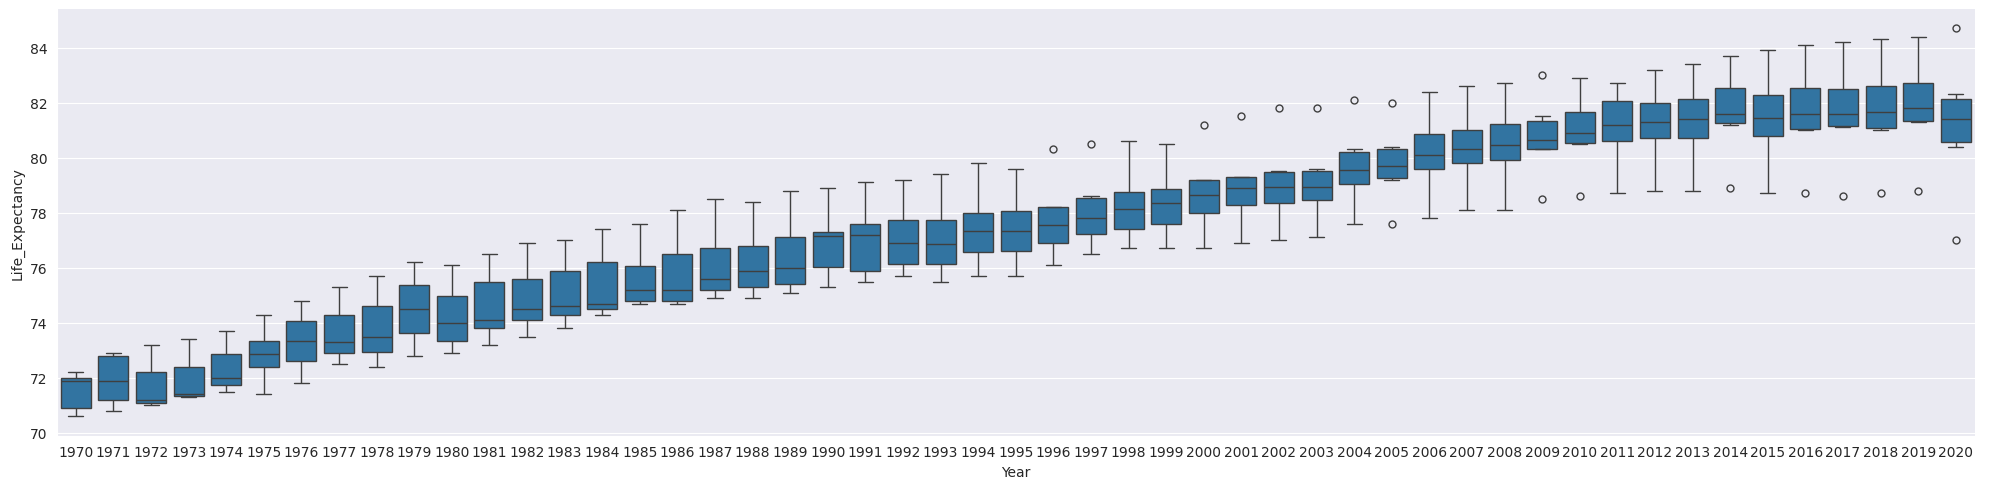

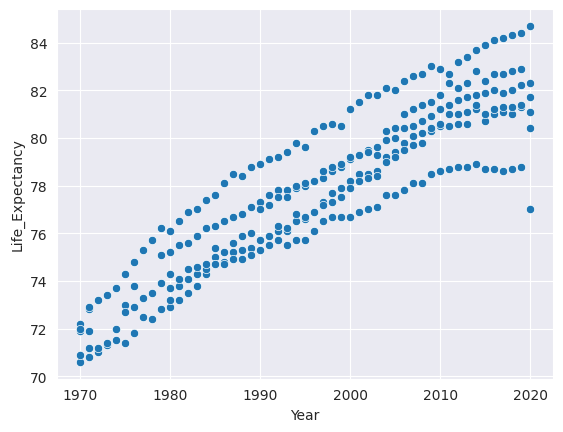

In [12]:
sns.catplot(data=df, x='Year', y='Life_Expectancy', kind='box', aspect=4)
# sns.lineplot(data=df, x='Year', y='Life_Expectancy')
plt.show()

sns.scatterplot(data=df,x='Year',y='Life_Expectancy')
plt.show()


6. Oups... Comment améliorer ce graphique ?

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

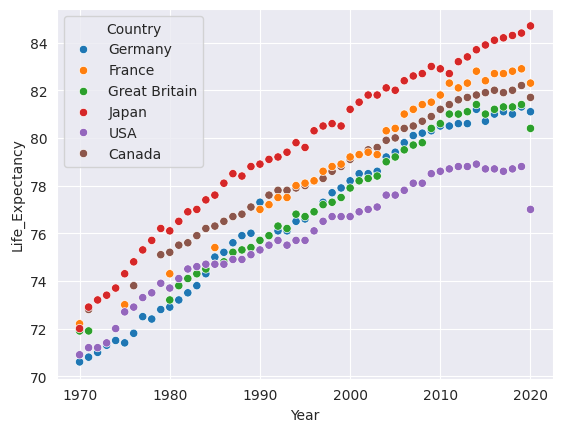

In [13]:
sns.scatterplot(data=df,x='Year',y='Life_Expectancy',hue='Country')



7. Observez l'évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps.

<Axes: xlabel='Year', ylabel='Spending_USD'>

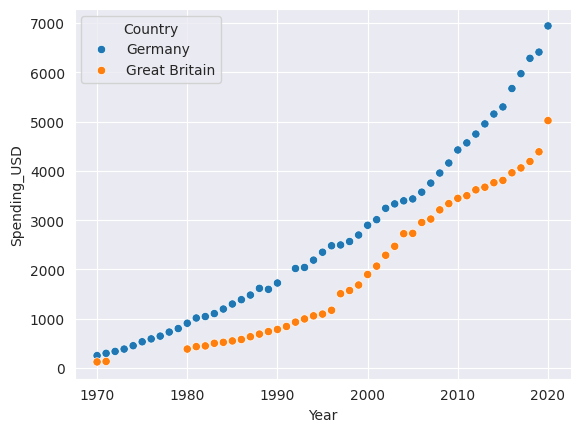

In [14]:
condition = df['Country'].isin(['Germany', 'Great Britain'])
sns.scatterplot(data=df[condition],x='Year',y='Spending_USD',hue='Country')


8. Observez l'histograme, la boxplot, et les statistiques de "Life_Expectancy" propre à chaque pays.

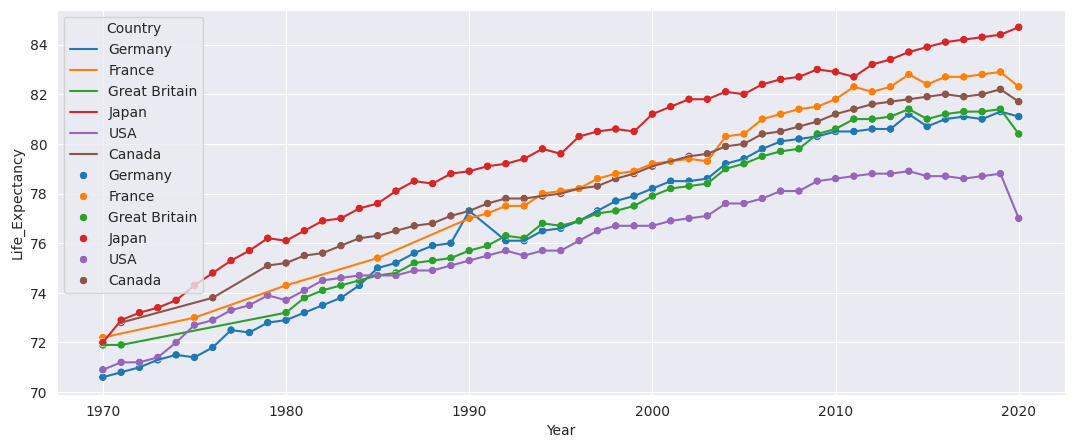

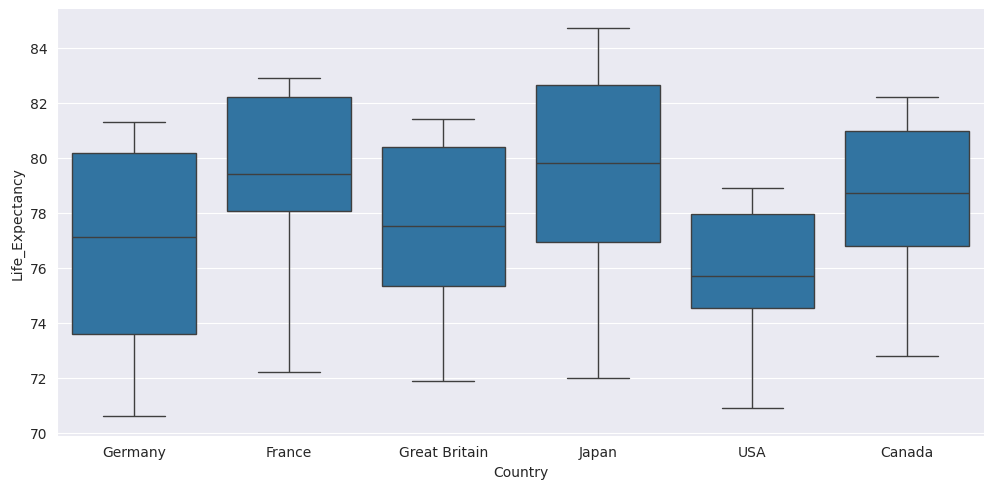

In [15]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
sns.scatterplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()
sns.catplot(data=df, x='Country', y='Life_Expectancy', kind='box', aspect=2)
plt.show()


9. Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

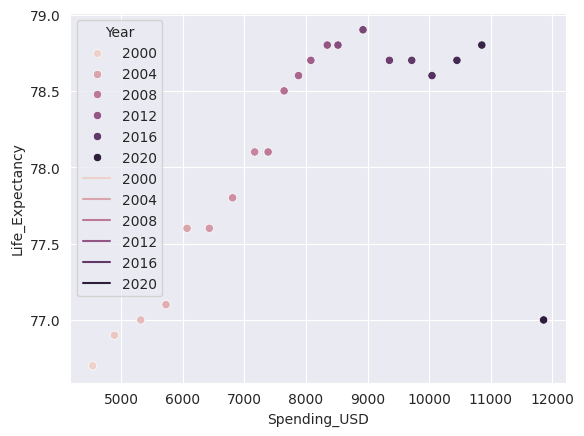

In [16]:
cond = (df['Country']=='USA') & (df['Year'].isin([i for i in range(2000,2021)]))
sns.scatterplot(data=df[cond],y='Life_Expectancy',x='Spending_USD',hue='Year')
sns.lineplot(data=df[cond],y='Life_Expectancy',x='Spending_USD',hue='Year' )


10. Il y a une valeur abérante tant tout cela. Laquelle? Pourquoi?

In [17]:
print('L\'espérance de vie de la dépense de 12000 est abérrante car elle ne suit pas du tout la corrélation observé entre ces 2 variables pour le reste des mesures' )

L'espérance de vie de la dépense de 12000 est abérrante car elle ne suit pas du tout la corrélation observé entre ces 2 variables pour le reste des mesures
